### ALP plots

2nd-year project

Introduction: ALP temporal + energy evolution (included), ALP spectrum (included), ALP spectrum at different t's (back-up)

In [1]:
# importing the necessary packages:

import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt

sys.path.append('/Users/milena/Desktop/2nd_yr_project/ALPs/gammaALPs/') # path to calc_alp_signal script
from calc_alp_signal import ALPSNSignal
from scipy import integrate

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

plt.rc('font', family='serif', size=18)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5

%matplotlib inline

In [2]:
# computing the ALP spectrum stuff:

EMeV = np.linspace(1.,1000.,500)
ts = np.linspace(0.,30.,500)
ee, tt = np.meshgrid(EMeV,ts, indexing = 'ij')


# mass = 10 solar masses

alp_sn10 = ALPSNSignal(Mprog = 10.)
dndedt_alp10 = alp_sn10(EMeV, ts, g10=0.1)

# mass = 18 solar masses 

alp_sn18 = ALPSNSignal(Mprog = 18.)
dndedt_alp18 = alp_sn18(EMeV, ts, g10=0.1)

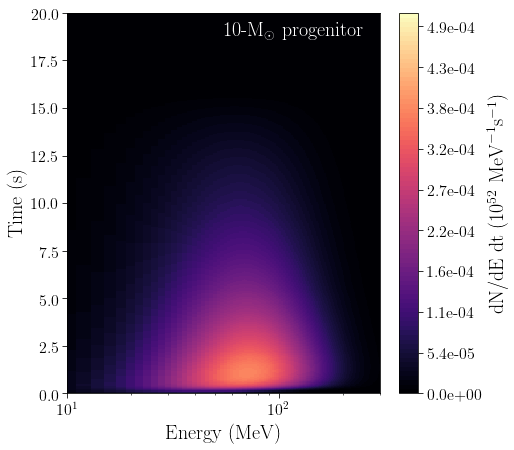

In [3]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter 

levels = MaxNLocator(nbins=100).tick_values(0.0, 0.0005)
cmap = plt.cm.get_cmap('magma')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.figure(figsize=(7,7))
c = plt.pcolormesh(ee, tt, dndedt_alp10, cmap=cmap, norm=norm)
plt.colorbar(format='%.1e').set_label(label=' dN/dE dt $(10^{52}$ $\mathrm{MeV}^{-1} \mathrm{s}^{-1})$',size=20,weight='bold')
plt.gca().set_xscale('log')
plt.gca().set_xlabel('Energy (MeV)', fontsize=20)
plt.gca().set_ylabel('Time (s)', fontsize=20)
plt.xlim(10,300)
plt.ylim(0,20)
plt.annotate('10-M$_{\\odot}$ progenitor', xy=(0.5, 0.93), xycoords='axes fraction', size=20, color='white', weight='bold')
# plt.savefig('ALP_mesh10.pdf')
plt.show()

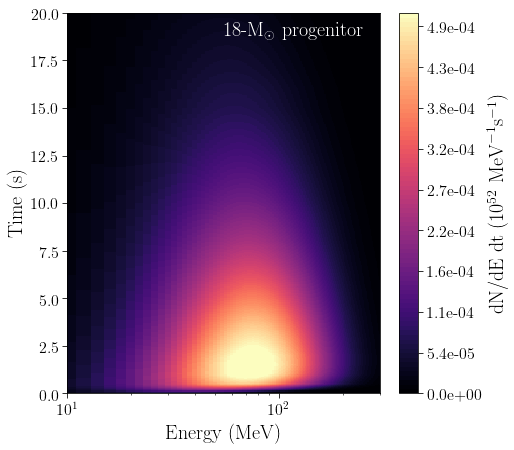

In [4]:
plt.figure(figsize=(7,7))
c = plt.pcolormesh(ee, tt, dndedt_alp18, cmap=cmap, norm=norm)
plt.colorbar(format='%.1e').set_label(label=' dN/dE dt $(10^{52}$ $\mathrm{MeV}^{-1} \mathrm{s}^{-1})$',size=20,weight='bold')
plt.gca().set_xscale('log')
plt.gca().set_xlabel('Energy (MeV)', fontsize=20)
plt.gca().set_ylabel('Time (s)', fontsize=20)
plt.xlim(10,300)
plt.ylim(0,20)
plt.annotate('18-M$_{\\odot}$ progenitor', xy=(0.5, 0.93), xycoords='axes fraction', size=20, color='white', weight='bold')
#plt.savefig('ALP_mesh18.pdf')
plt.show()

In [5]:
# def norm(d, g, P):
#     """
#     input:
#     d = distance, in Mpc
#     g = coupling, in GeV^-1
#     P = conversion probability
#     -----
#     output:
#     norm = ALP spectral normalization, in cm^-2
#     """
#     a = 8.4e-54
#     g0 = 1e-11
#     P0 = 0.1
    
#     return  a * (10/d)**2 * (g/g0)**4 * (P/P0)
# N = norm(d = 10*np.sqrt(8.4e-54), g=1e-11, P=0.1)

In [14]:
# producing a light curve (integrating over energies [0]), and SED
# (integrating over time [1]):

lc10 = integrate.simps(dndedt_alp10, axis=0)
sed10 = integrate.simps(dndedt_alp10, axis=1)

lc18 = integrate.simps(dndedt_alp18, axis = 0)
sed18 = integrate.simps(dndedt_alp18, axis = 1)

# plt.plot(ts, lc10)
# plt.plot(ts, lc18)

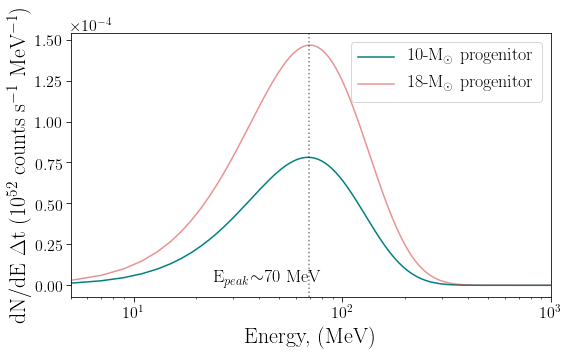

In [9]:
SED10 = integrate.simps(dndedt_alp10, tt, axis = 1)/tt.max() # using the average for 10 solar masses
SED18 = integrate.simps(dndedt_alp18, tt, axis = 1)/tt.max() # using the average for 18 solar masses
# SED18 = integrate.simps(dndedt_alp18, axis = 1)/20. # using the average

SED_max10 = np.max(SED10)
SED_Emax10 = EMeV[np.where(SED10 == SED_max10)]
SED_max18 = np.max(SED18)
SED_Emax18 = EMeV[np.where(SED18 == SED_max18)]

plt.figure(figsize=(8,5))
plt.plot(EMeV, SED10, color = '#008080',  label = '10-M$_{\\odot}$ progenitor')
plt.plot(EMeV, SED18, color = 'C3', linestyle = '-',alpha=0.5, label = '18-M$_{\\odot}$ progenitor')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xscale('log')
#plt.yscale('log')
#plt.axvspan(40, 100, alpha=0.2, color='#85C1E9')
plt.axvline(SED_Emax10, color='k',linestyle = ':', alpha=0.5)#, label='max emission = %.2f MeV' %SED_Emax10)
#plt.axvline(SED_Emax18, color='#800080', alpha=0.5,linewidth=0.5)#, label='max emission = %.2f MeV' %SED_Emax18)
plt.xlim(5,1000)
plt.text(24, 0.000, 'E$_{peak}$$\sim$70 MeV ', fontsize=18)
plt.xlabel('Energy, (MeV)', fontsize=22)
plt.ylabel('dN/dE $\Delta$t ($10^{52}$ counts s$^{-1}$ MeV$^{-1}$)', fontsize=22)

plt.legend(fontsize=18)
plt.tight_layout()
#plt.savefig('ALP_spectrum.pdf')
plt.show()

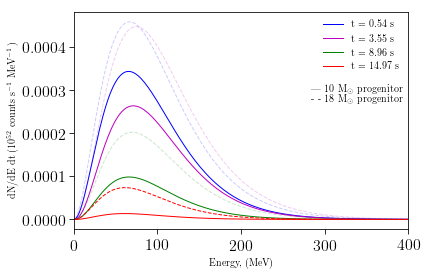

In [10]:
plt.figure()
plt.plot(EMeV, dndedt_alp10[:, 9], 'b', linewidth = 1, label = 't = %.2f s' %ts[9])
#plt.plot(energy, dndedt_alp10[:, 29], label = 't = %.2f s' %ts[29])
plt.plot(EMeV, dndedt_alp10[:, 59],'m', linewidth = 1,  label = 't = %.2f s' %ts[59])
#plt.plot(energy, dndedt_alp10[:, 99], label = 't = %.2f s' %ts[99])
plt.plot(EMeV, dndedt_alp10[:, 149], 'g',linewidth = 1,  label = 't = %.2f s' %ts[149])
#plt.plot(energy, dndedt_alp10[:, 199], 'c',linewidth = 1, label = 't = %.2f s' %ts[199])
plt.plot(EMeV, dndedt_alp10[:, 249], 'r',linewidth = 1, label = 't = %.2f s' %ts[249])

plt.plot(EMeV, dndedt_alp18[:, 9],'b--',linewidth = 1, alpha=0.2)
#plt.plot(energy, dndedt_alp18[:, 29], '.')
plt.plot(EMeV, dndedt_alp18[:, 59],'m--',linewidth = 1, alpha=0.2)
#plt.plot(energy, dndedt_alp18[:, 99], '.')
plt.plot(EMeV, dndedt_alp18[:, 149], 'g--',linewidth = 1, alpha=0.2)
#plt.plot(energy, dndedt_alp18[:, 199], 'c--',linewidth = 1, alpha=0.5)
plt.plot(EMeV, dndedt_alp18[:, 249], 'r--',linewidth = 1, alpha=1)

plt.legend(frameon=False)
#plt.tight_layout()
plt.xlim(0,400)
plt.xlabel('Energy, (MeV)')
plt.ylabel('dN/dE dt ($10^{52}$ counts s$^{-1}$ MeV$^{-1}$)') 
plt.annotate('--- 10 M$_{\\odot}$ progenitor \n - - 18 M$_{\\odot}$ progenitor', xy=(0.71, 0.58), xycoords='axes fraction')
#plt.savefig('ALP_spectrum.pdf')
plt.show()